
# Valve sizing

*Written by Valentine HABRARD (PhD student at ISAE-SUPAERO) in Toulouse, France.*

The objective of this notebook is to give the methodology of how the thermal management system (TMS) valves are sized. 

The mass and volume of the bypass valves used in TMS are determined as a function of its maximum mass flow. Valve data is collected from industry catalogues and includes the following manufacturers: Parker, WattsIndustries, Caleffi. 

The following links are used and were accessed on 12/2022.

* https://paro.nl/library/components/parker/th-1000-16fo
* https://wattswater.fr/upload/iblock/543/VU02_VU3_VU4_TS_IT_W_UK_01_18_Rev.1web.pdf
* https://www.caleffi.com/sites/default/files/file/01007_en.pdf

The valves are either denoted thermal bypass valves, 2 way zone valves or differential bypass valves. The data is given below and images are shown in the Appendix. The volume is computed by assuming rectangular boxes.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit


## Mass

y = 0.56800 * x**0.55410


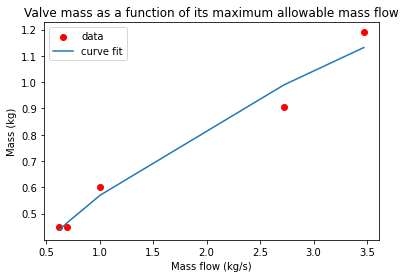

R squared value: 0.9724493749494594


In [40]:
m = [0.625, 0.694, 1.007, 2.724, 3.47] # maximum mass flow, kg/s
M = [0.45, 0.45, 0.6, 0.907, 1.19] # mass, kg

m = np.array(m)

# define the true objective function
def objective(m, a, b):
    return a * m**b

popt, pcov = curve_fit(objective, m, M)
a, b = popt
print("y = %.5f * x**%.5f" % (a, b))

# plot
plt.scatter(m, M, c="red", label="data")
plt.plot(m, a * m**b, label="curve fit")
plt.xlabel("Mass flow (kg/s)")
plt.ylabel("Mass (kg)")
plt.title("Valve mass as a function of its maximum allowable mass flow")
plt.legend(loc="upper left")
plt.show()

# getting R²
residuals = M - objective(m, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((M- np.mean(M)) ** 2)

r_squared = 1 - (ss_res / ss_tot)
print("R squared value:", r_squared)

## Volume

y = 0.00006 * x + 0.00008


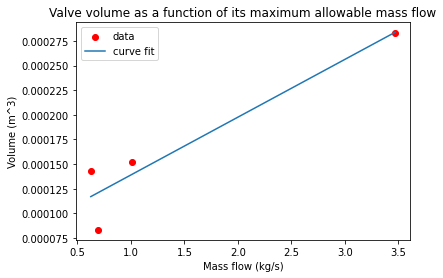

R squared value: 0.893371284924952


In [44]:
m = [0.625, 0.694, 1.007, 3.47] # maximum mass flow, kg/s
V = [0.000143, 0.0000832, 0.000152, 0.000283] # volume, m^3

m = np.array(m)

# define the true objective function
def objective(m, a, b):
    return a * m + b

popt, pcov = curve_fit(objective, m, V)
a, b = popt
print("y = %.5f * x + %.5f" % (a, b))

# plot
plt.scatter(m, V, c="red", label="data")
plt.plot(m, a*m + b, label="curve fit")
plt.xlabel("Mass flow (kg/s)")
plt.ylabel("Volume (m^3)")
plt.title("Valve volume as a function of its maximum allowable mass flow")
plt.legend(loc="upper left")
plt.show()

# getting R²
residuals = V - objective(m, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((V- np.mean(V)) ** 2)

r_squared = 1 - (ss_res / ss_tot)
print("R squared value:", r_squared)

## Appendix

![valve1.jpeg](img/Valve_Caleffi.JPG)
![valve2.jpeg](img/Valve_Parker.JPG)
![valve3.jpeg](img/Valve_Watts.JPG)
![valve4.jpeg](img/Valve_Watts_2.JPG)
![valve5.jpeg](img/Valve_Watts_3.JPG)